In [1]:
%matplotlib inline

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
tf.nn.conv2d?

In [4]:
# 下载MNIST数据集并生成DataSet对象
# 使用OneHot编码处理标记
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [6]:
tf.nn.pool?

In [5]:
# 训练集图片矩阵，代表55000张图片，每张图片为一个向量，其长度为784
mnist.train.images.shape

(55000, 784)

In [6]:
# 训练集标记矩阵，代表55000张图片的标记，每张图片为一个10维的独热编码向量
mnist.train.labels.shape

(55000, 10)

In [7]:
mnist.test.images.shape

(10000, 784)

In [8]:
mnist.test.labels.shape

(10000, 10)

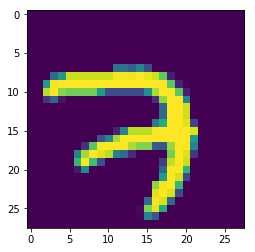

In [9]:
# 可视化训练集中的图片
plt.imshow(Image.fromarray(mnist.train.images[0].reshape(28, 28)))

In [10]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [11]:
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
step     0, loss 13.7659, acc 0.1135
step   500, loss 11.8558, acc 0.3320
step  1000, loss 6.3970, acc 0.4407
step  1500, loss 7.0626, acc 0.4876
step  2000, loss 9.3546, acc 0.5096
step  2500, loss 7.4074, acc 0.5275
step  3000, loss 6.5146, acc 0.5370
step  3500, loss 7.5560, acc 0.5429
step  4000, loss 7.0516, acc 0.5508
step  4500, loss 6.7008, acc 0.5629
step  5000, loss 5.0369, acc 0.5763
step  5500, loss 6.9568, acc 0.5952
step  6000, loss 4.5335, acc 0.6130
step  6500, loss 2.4429, acc 0.6380
step  7000, loss 6.1986, acc 0.6854
step  7500, loss 2.5222, acc 0.7048
step  8000, loss 4.0955, acc 0.7221
step  8500, loss 5.1954, acc 0.7396
step  9000, loss 3.5259, acc 0.7586
step  9500, loss 2.4457, acc 0.7700
step 10000, loss 3.6616, acc 0.7765
step 10500, loss 2.0608, acc 0.7823
step 11000, loss 3.7274, acc 0.7878
step 11500, loss 2.7683, acc 0.7896
step 12000, lo

## 作业

1. 浮现上述代码。
2. 计算模型参数。
3. 使用不同大小的批次进行实验，观察模型收敛速度与收敛平稳性。
4. 使用不同大小的学习率进行实验，观察模型收敛速度与收敛平稳性。
5. 使用不同的激活函数进行实验，观察模型收敛速度与收敛平性能。
6. 尝试使用不同的参数初始化方法（如使用不同的正态分布、均匀分布、固定值等方法），观察模型收敛速度。
7. 思考如何改进模型以使得模型性能增强。
8. 思考如何给模型添加新的隐藏层并进行实验。

*说明：需对上述问题进行代码实现与结论总结*

2. 其他条件保持不变，分别将原来批次修改成64和16，发现64的正确率相比32的有所下降，而16的相比32有所上升；当批次大小变大时，模型的收敛速度会加快，但是训练误差不稳步下降；当批次大小变小时，发现模型收敛速度变慢，当误差下降的相对更稳

In [13]:
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(64)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 14.3527, acc 0.0889
step   500, loss 12.1756, acc 0.2902
step  1000, loss 7.7367, acc 0.4304
step  1500, loss 7.3379, acc 0.4987
step  2000, loss 5.8388, acc 0.5317
step  2500, loss 6.1692, acc 0.5593
step  3000, loss 7.8774, acc 0.5933
step  3500, loss 6.4740, acc 0.6167
step  4000, loss 5.0948, acc 0.6406
step  4500, loss 4.5671, acc 0.6491
step  5000, loss 3.7844, acc 0.6597
step  5500, loss 4.6567, acc 0.6605
step  6000, loss 4.9594, acc 0.6669
step  6500, loss 5.0375, acc 0.6783
step  7000, loss 4.8272, acc 0.6766
step  7500, loss 4.2814, acc 0.6795
step  8000, loss 5.4769, acc 0.6819
step  8500, loss 4.5784, acc 0.6870
step  9000, loss 5.7302, acc 0.6891
step  9500, loss 5.7463, acc 0.6913
step 10000, loss 5.6437, acc 0.6898
step 10500, loss 4.2814, acc 0.6969
step 11000, loss 5.0225, acc 0.6989
step 11500, loss 4.1043, acc 0.6954
step 12000, loss 4.3970, acc 0.6963
step 12500, loss 3.6254, acc 0.7057
step 13000, loss 5.0411, acc 0.7011
step 13500, loss 3.4403, a

In [14]:
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(128)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(16)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 13.7379, acc 0.0839
step   500, loss 9.2593, acc 0.3700
step  1000, loss 7.0164, acc 0.4986
step  1500, loss 6.9927, acc 0.5773
step  2000, loss 5.6142, acc 0.6292
step  2500, loss 6.0180, acc 0.6540
step  3000, loss 4.5560, acc 0.6925
step  3500, loss 4.1323, acc 0.7200
step  4000, loss 2.8417, acc 0.7286
step  4500, loss 3.5667, acc 0.7506
step  5000, loss 3.3225, acc 0.7530
step  5500, loss 3.6103, acc 0.7674
step  6000, loss 4.1849, acc 0.7712
step  6500, loss 4.0601, acc 0.7744
step  7000, loss 3.1643, acc 0.7837
step  7500, loss 3.3448, acc 0.7778
step  8000, loss 2.4979, acc 0.7891
step  8500, loss 1.5283, acc 0.8273
step  9000, loss 1.8288, acc 0.8496
step  9500, loss 1.8989, acc 0.8578
step 10000, loss 2.1294, acc 0.8718
step 10500, loss 0.5762, acc 0.8662
step 11000, loss 1.6304, acc 0.8770
step 11500, loss 1.0390, acc 0.8826
step 12000, loss 1.3489, acc 0.8830
step 12500, loss 1.3941, acc 0.8788
step 13000, loss 1.5038, acc 0.8882
step 13500, loss 1.4045, ac

3. 使用不同大小的学习率进行实验，观察模型收敛速度与收敛平稳性

In [16]:
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(128)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 13.2972, acc 0.0999
step   500, loss 4.8398, acc 0.6902
step  1000, loss 3.9271, acc 0.7210
step  1500, loss 3.9644, acc 0.7413
step  2000, loss 4.0281, acc 0.7435
step  2500, loss 2.9047, acc 0.7485
step  3000, loss 3.1895, acc 0.7493
step  3500, loss 2.5322, acc 0.7545
step  4000, loss 3.8324, acc 0.7547
step  4500, loss 4.5552, acc 0.7643
step  5000, loss 2.2440, acc 0.8196
step  5500, loss 2.9556, acc 0.8223
step  6000, loss 2.7184, acc 0.8348
step  6500, loss 2.4556, acc 0.8332
step  7000, loss 2.8535, acc 0.8408
step  7500, loss 2.0822, acc 0.8346
step  8000, loss 2.8166, acc 0.8361
step  8500, loss 2.0322, acc 0.8450
step  9000, loss 2.1688, acc 0.8415
step  9500, loss 1.5450, acc 0.8439
step 10000, loss 1.6838, acc 0.8469
step 10500, loss 2.1554, acc 0.8468
step 11000, loss 2.1638, acc 0.8481
step 11500, loss 2.2678, acc 0.8491
step 12000, loss 2.6627, acc 0.8452
step 12500, loss 1.7637, acc 0.8490
step 13000, loss 2.5695, acc 0.8513
step 13500, loss 1.6596, ac

In [17]:
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(128)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(16)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 12.2607, acc 0.1536
step   500, loss 12.6064, acc 0.1875
step  1000, loss 12.5209, acc 0.2043
step  1500, loss 12.3345, acc 0.2244
step  2000, loss 12.4778, acc 0.2412
step  2500, loss 12.2389, acc 0.2470
step  3000, loss 12.0452, acc 0.2766
step  3500, loss 11.6201, acc 0.2756
step  4000, loss 10.0868, acc 0.2973
step  4500, loss 10.6252, acc 0.3049
step  5000, loss 10.3079, acc 0.3109
step  5500, loss 11.1483, acc 0.3277
step  6000, loss 10.6887, acc 0.3209
step  6500, loss 9.6206, acc 0.3438
step  7000, loss 9.7970, acc 0.3506
step  7500, loss 10.8906, acc 0.3512
step  8000, loss 10.0424, acc 0.3566
step  8500, loss 10.1256, acc 0.3678
step  9000, loss 9.9283, acc 0.3726
step  9500, loss 8.8321, acc 0.3788
step 10000, loss 10.5412, acc 0.3862
step 10500, loss 9.5811, acc 0.3992
step 11000, loss 8.7624, acc 0.3862
step 11500, loss 8.6453, acc 0.3964
step 12000, loss 9.1062, acc 0.4087
step 12500, loss 9.1875, acc 0.4109
step 13000, loss 9.5922, acc 0.4179
step 13500,

上面的学习率分别为0.1和0.001，其他条件相同。观察训练结果发现，学习率调高，会使训练速度加快，但不稳；调小学习率，会使训练变慢，模型平稳性更好；

4. 使用不同的激活函数进行实验，观察模型收敛速度与收敛性能。


In [23]:
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
#     output = tf.nn.softmax(logits)
    output = tf.nn.relu(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(64)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(16)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 9.4845, acc 0.1310
step   500, loss -4.2885, acc 0.2039
step  1000, loss -4.9472, acc 0.2157
step  1500, loss -5.1340, acc 0.2246
step  2000, loss -5.2431, acc 0.2470
step  2500, loss -5.3106, acc 0.2520
step  3000, loss -5.4150, acc 0.2648
step  3500, loss -5.5696, acc 0.2708
step  4000, loss -5.6074, acc 0.2827
step  4500, loss -5.7004, acc 0.2951
step  5000, loss -5.6994, acc 0.2875
step  5500, loss -5.8147, acc 0.3071
step  6000, loss -5.8488, acc 0.3037
step  6500, loss -5.8320, acc 0.3153
step  7000, loss -5.9933, acc 0.3283
step  7500, loss -6.0026, acc 0.3257
step  8000, loss -6.0594, acc 0.3235
step  8500, loss -6.0867, acc 0.3317
step  9000, loss -6.1159, acc 0.3538
step  9500, loss -6.1771, acc 0.3397
step 10000, loss -6.2499, acc 0.3401
step 10500, loss -6.2439, acc 0.3540
step 11000, loss -6.2326, acc 0.3578
step 11500, loss -6.2843, acc 0.3600
step 12000, loss -6.2994, acc 0.3572
step 12500, loss -6.3838, acc 0.3708
step 13000, loss -6.3445, acc 0.3672
st

5. 尝试使用不同的参数初始化方法（如使用不同的正态分布、均匀分布、固定值等方法），观察模型收敛速度。


In [24]:
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    
    hidden_weight = tf.Variable(tf.truncated_normal([784, 128]), name='hidden_weight')
#     hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(128)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(16)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 14.3751, acc 0.0549
step   500, loss 14.4842, acc 0.0681
step  1000, loss 15.0892, acc 0.0913
step  1500, loss 13.6254, acc 0.1168
step  2000, loss 13.7814, acc 0.1316
step  2500, loss 12.8922, acc 0.1548
step  3000, loss 13.9217, acc 0.1711
step  3500, loss 13.5558, acc 0.1853
step  4000, loss 12.4827, acc 0.1941
step  4500, loss 11.9097, acc 0.2157
step  5000, loss 11.6202, acc 0.2145
step  5500, loss 11.1616, acc 0.2310
step  6000, loss 11.7236, acc 0.2438
step  6500, loss 12.3821, acc 0.2458
step  7000, loss 12.0161, acc 0.2542
step  7500, loss 10.7254, acc 0.2722
step  8000, loss 11.2353, acc 0.2662
step  8500, loss 11.6090, acc 0.2734
step  9000, loss 11.7761, acc 0.2762
step  9500, loss 11.4290, acc 0.2786
step 10000, loss 12.1089, acc 0.2917
step 10500, loss 10.9486, acc 0.2953
step 11000, loss 12.3234, acc 0.2887
step 11500, loss 12.4901, acc 0.2965
step 12000, loss 10.1717, acc 0.2913
step 12500, loss 11.8163, acc 0.2983
step 13000, loss 10.6986, acc 0.3009
s

6. 思考如何改进模型以使得模型性能增强。


可以调整模型的学习率、训练批次的大小、激活函数、增加隐藏层、增加训练总的步数等来查看是否会提升模型性能

7. 思考如何给模型添加新的隐藏层并进行实验


In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data


In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
mnist.validation.images[0].shape

(784,)

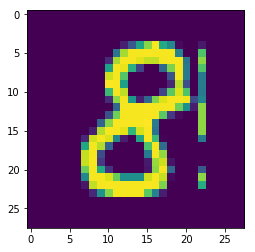

In [9]:
plt.imshow(Image.fromarray(mnist.train.images[9].reshape(28, 28)))

In [11]:
mnist.train.labels[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [17]:
with tf.Graph().as_default() as g:
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    h1_w = tf.Variable(tf.random_normal([784, 64]), name='h1_w')
    h1_b = tf.Variable(tf.zeros([64, ]), name='h1_b')
    h1_o = tf.nn.relu(tf.matmul(inputs, h1_w)+h1_b)
    
    h2_w = tf.Variable(tf.random_normal([64, 128]), name='h2_w')
    h2_b = tf.Variable(tf.zeros([128, ]), name='h2_b')
    h2_o = tf.nn.relu(tf.matmul(h1_o, h2_w)+h2_b)
    
    o_w = tf.Variable(tf.random_normal([128, 10]), name='o_w')
    o_b = tf.Variable(tf.zeros([10, ]), name='o_w')
    
    logits = tf.matmul(h2_o, o_w) + o_b
    output = tf.nn.softmax(logits)
    
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
            labels * tf.log(output + 1e-7), axis=1))
    
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)), 
                dtype=tf.float32))
    
    with tf.Session(graph=g) as sess:
        optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
        
        train_op = optim.minimize(loss)
        sess.run(tf.global_variables_initializer())
        
        for step in range(50000):
            batch_images, batch_labels = mnist.train.next_batch(32)
            res_loss, _ = sess.run([loss, train_op], feed_dict={
                        inputs: batch_images,
                        labels: batch_labels
            })
            
            if step % 500 ==0:
                accs = []
                for test_step in range(10000 // 32):
                    batch_images, batch_labels = mnist.test.next_batch(32)
                    
                    res_acc = sess.run(acc, feed_dict={
                        inputs: batch_images,
                        labels: batch_labels
                    })
                    
                    accs.append(res_acc)
                accs = np.mean(accs)
                print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))
    

step     0, loss 15.6144, acc 0.0663
step   500, loss 13.5996, acc 0.1597
step  1000, loss 13.0960, acc 0.1715
step  1500, loss 13.0960, acc 0.1920
step  2000, loss 12.0886, acc 0.2304
step  2500, loss 13.5996, acc 0.2517
step  3000, loss 12.5923, acc 0.2633
step  3500, loss 11.0812, acc 0.2703
step  4000, loss 10.5775, acc 0.2722
step  4500, loss 12.0886, acc 0.2746
step  5000, loss 10.0738, acc 0.2788
step  5500, loss 11.5849, acc 0.2729
step  6000, loss 10.5775, acc 0.2856
step  6500, loss 12.0886, acc 0.2781
step  7000, loss 10.5775, acc 0.2826
step  7500, loss 11.5849, acc 0.2817
step  8000, loss 12.5923, acc 0.2844
step  8500, loss 11.5849, acc 0.2833
step  9000, loss 10.5775, acc 0.3847
step  9500, loss 7.5554, acc 0.4399
step 10000, loss 9.2250, acc 0.4571
step 10500, loss 8.1089, acc 0.4779
step 11000, loss 6.5480, acc 0.4973
step 11500, loss 6.5480, acc 0.5356
step 12000, loss 8.0590, acc 0.5495
step 12500, loss 6.5480, acc 0.5511
step 13000, loss 4.3386, acc 0.5689
step 1350